# Linear Regression on Fuel Consumption

In [0]:
np.random.seed(0)

In [0]:
import numpy as np

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
a = np.random.normal(100, 20, 1000)

(array([ 1.,  1.,  2.,  3.,  2.,  2.,  5.,  2.,  6.,  5.,  8., 12., 18.,
        13., 19., 19., 27., 25., 39., 36., 40., 39., 50., 48., 40., 54.,
        46., 40., 48., 51., 38., 25., 34., 32., 31., 26., 14., 18., 15.,
        13.,  8.,  9., 10.,  6.,  5.,  5.,  5.,  2.,  1.,  2.]),
 array([ 39.0771389 ,  41.39933817,  43.72153744,  46.04373671,
         48.36593597,  50.68813524,  53.01033451,  55.33253378,
         57.65473304,  59.97693231,  62.29913158,  64.62133085,
         66.94353011,  69.26572938,  71.58792865,  73.91012792,
         76.23232718,  78.55452645,  80.87672572,  83.19892499,
         85.52112425,  87.84332352,  90.16552279,  92.48772206,
         94.80992132,  97.13212059,  99.45431986, 101.77651913,
        104.09871839, 106.42091766, 108.74311693, 111.0653162 ,
        113.38751546, 115.70971473, 118.031914  , 120.35411327,
        122.67631254, 124.9985118 , 127.32071107, 129.64291034,
        131.96510961, 134.28730887, 136.60950814, 138.93170741,
        141.

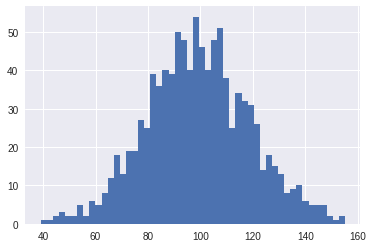

In [16]:
%matplotlib inline
plt.hist(a, 50)


In [17]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


Redirecting output to ‘wget-log’.


In [18]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [19]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

('Coefficients: ', array([[39.04434473]]))
('Intercept: ', array([126.06053045]))


Text(0,0.5,u'Emission')

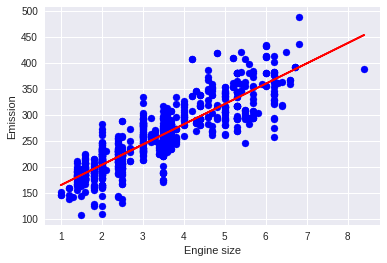

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.predict(train_x), '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")